| Nama               | NIM        | Kelas   |
| -------------------- | ------------ | --------- |
| Dedy Bayu Setiawan | 2341720041 | TI - 3H |


## Deskripsi Umum

Tugas kali ini adalah mengerjakan studi kasus **analisis data dan clustering** menggunakan **unsupervised learning** dengan langkah-langkah sebagai berikut:

---

### 1. Preprocessing Data
- Tangani **missing values** (imputasi *mean/median/modus* sesuai jenis data)  
- **Normalisasi** atau **standarisasi** data  
- Buat **minimal satu fitur baru** hasil kombinasi fitur lama  

---

### 2. Clustering
- Terapkan **K-Means** dan **DBSCAN**  
- Bandingkan hasil clustering menggunakan:
  - **Silhouette Score**
  - **Davies–Bouldin Index**

---

### 3. Approximate Nearest Neighbor (ANN)
- Gunakan **Annoy** untuk mencari tetangga terdekat dari beberapa *query points* hasil clustering  
- Tampilkan output berupa:
  - **Index query point**
  - **Daftar tetangga terdekat yang ditemukan**
  - **Nilai jarak kemiripan**


---

# Tugas 2 — Credit Card Dataset

Untuk mahasiswa dengan nomor absen 2, 5, 8, dst.

- **Dataset:** Credit Card Dataset for Clustering  
- **Deskripsi:** Dataset ini berisi data perilaku pengguna kartu kredit. Gunakan untuk menemukan kelompok pelanggan berdasarkan pola penggunaan.

---

## Langkah tambahan

- Tangani missing values dan normalisasi fitur numerik.  
- Buat fitur baru seperti rasio antara BALANCE dan PURCHASES.


# Import Library

In [134]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from annoy import AnnoyIndex
import matplotlib.pyplot as plt
import seaborn as sns
import random
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors

# Baca Dataset

In [135]:
df = pd.read_csv("data/UCI_Credit_Card.csv")
display(df.info())
display(df.describe())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

None

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


**Penjelasan:** Jumlah data ada 30.000 baris dengan jumlah kolom ada 25, ada 13 kolom bertipe float64, dan 12 kolom bertipe int64. 

# Data Preprocessing 

Cek apakah ada missing value di data aal

In [151]:
df.isnull().sum()[df.isnull().sum() > 0]


Balance_Purchase_Ratio    1432
dtype: int64

tidak ditemukan missing value di data awal

In [152]:
df.fillna(df.mean(), inplace=True)

df["Avg_Balance"] = df[
    ["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]
].mean(axis=1)
df["Avg_Payment"] = df[
    ["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]
].mean(axis=1)

df["Balance_Purchase_Ratio"] = df["Avg_Balance"] / df["Avg_Payment"].replace(0, pd.NA)

num_df = df.select_dtypes(include=["float64", "int64"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(num_df)

normalized_df = pd.DataFrame(X_scaled, columns=num_df.columns)

display(normalized_df.head())

/tmp/ipykernel_7691/153281543.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(df.mean(), inplace=True)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,Avg_Balance,Avg_Payment
0,-1.731993,-1.136720,0.810161,0.185828,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.666599,...,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1.876378,-0.690692,-0.509027
1,-1.731878,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.874991,1.782348,0.138865,0.188746,...,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1.876378,-0.665997,-0.438153
2,-1.731762,-0.597202,0.810161,0.185828,0.858557,-0.161156,0.014861,0.111736,0.138865,0.188746,...,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,-0.532942,-0.443170,-0.339216
3,-1.731647,-0.905498,0.810161,0.185828,-1.057295,0.164303,0.014861,0.111736,0.138865,0.188746,...,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,-0.532942,-0.101507,-0.382454
4,-1.731531,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.874991,0.111736,-0.696663,0.188746,...,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,-0.532942,-0.422920,0.450421


Fitur baru yang saya tambahkan adalah ```Balance_Purchase_Ratio``` yang mana fitur ini merupakan Rasio antara saldo dan pembayaran — digunakan untuk melihat perbandingan antara tagihan dan kemampuan membayar. Namun fitur ini tidak berdiri sendiri terdapat juga fitur ```Avg_Balance``` yang menunjukan avg saldo tagihan bulanan dan ```Avg_Payment``` yang menunjukkan rata" pembayaran bulanan selama 6 bulan terakhir. Yang mana ```Balance_Purchase_Ratio``` diambil dari ```Avg_Balance``` / ```Avg_Payment```.

Cek apakah masih ada missing value

In [153]:

normalized_df[normalized_df.columns[normalized_df.isnull().any()]].isnull().sum()

Series([], dtype: float64)

---

# KMeans


In [139]:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

## Looping untuk mencari nilai k terbaik

In [ ]:
wcss = []
silhouette_scores = []
K_range = range(2, 15)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    wcss.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))
    print(f"k={k}, silhouette score={silhouette_scores[-1]:.4f}")

/home/dedybayu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k=2, silhouette score=0.3509


/home/dedybayu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k=3, silhouette score=0.1624


/home/dedybayu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k=4, silhouette score=0.1405


/home/dedybayu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k=5, silhouette score=0.1511


/home/dedybayu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k=6, silhouette score=0.1444


/home/dedybayu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k=7, silhouette score=0.1218


/home/dedybayu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k=8, silhouette score=0.1215


/home/dedybayu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k=9, silhouette score=0.1169


/home/dedybayu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k=10, silhouette score=0.1077


/home/dedybayu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k=11, silhouette score=0.1110


/home/dedybayu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k=12, silhouette score=0.1082


/home/dedybayu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k=13, silhouette score=0.1093


/home/dedybayu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k=14, silhouette score=0.0999


## Mencari elbow menggunakan KneeLocator agar otomatis dan akurat

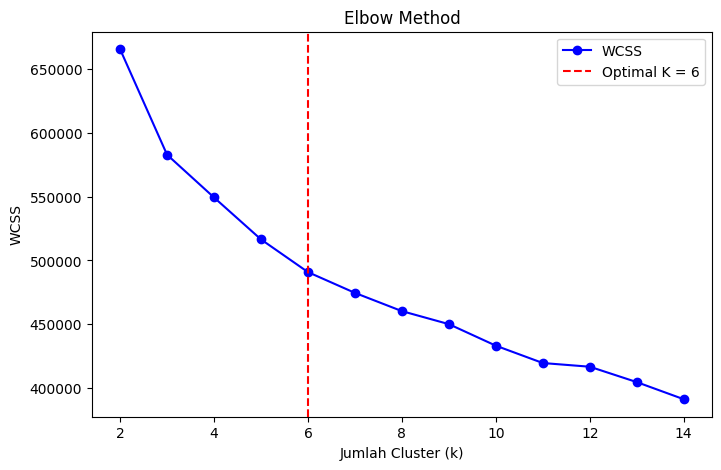


Optimal number of clusters (Elbow Method): 6


In [141]:
# Cari titik elbow otomatis
kneedle_kmeans = KneeLocator(
    list(K_range), wcss, curve="convex", direction="decreasing"
)
optimal_k = kneedle_kmeans.elbow if kneedle_kmeans.elbow is not None else 3

# === Plot Elbow Method ===
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, "bo-", label="WCSS")
if kneedle_kmeans.elbow is not None:
    plt.axvline(optimal_k, color="r", linestyle="--", label=f"Optimal K = {optimal_k}")
plt.title("Elbow Method")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("WCSS")
plt.legend()
plt.show()

print(f"\nOptimal number of clusters (Elbow Method): {optimal_k}")

## Menjalankan KMeans menggunakan nilai k yang didapat

In [142]:
kmeans = KMeans(n_clusters=optimal_k, random_state=RANDOM_SEED)
kmeans_labels = kmeans.fit_predict(X_scaled)

/home/dedybayu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# DBSCAN


## Mencari Epsilon

In [ ]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

distances = np.sort(distances[:, 4])

In [144]:
kneedle_db = KneeLocator(
    range(len(distances)), distances, S=1.0, curve="convex", direction="increasing"
)
eps_optimal = distances[kneedle_db.knee] if kneedle_db.knee is not None else 0.5

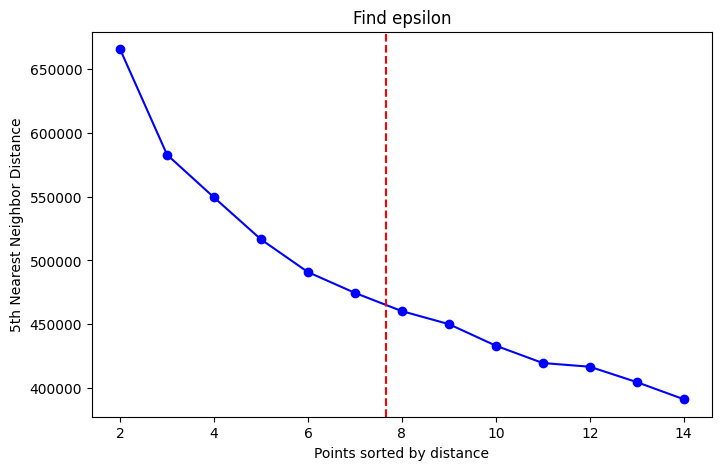

Optimal epsilon: 7.667340207067311


In [145]:
# Plot
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, "bo-", label="WCSS")
if kneedle_db.knee is not None:
    plt.axvline(
        eps_optimal, color="r", linestyle="--", label=f"Optimal K = {eps_optimal}"
    )
plt.ylabel("5th Nearest Neighbor Distance")
plt.xlabel("Points sorted by distance")
plt.title("Find epsilon")
plt.show()

print(f"Optimal epsilon: {eps_optimal}")

## Menjalankan DBSCAN menggunakan Epsilon optimal yang telah didapat

In [ ]:
dbscan = DBSCAN(eps=eps_optimal, min_samples=15)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [ ]:
print("KMeans Silhouette:", silhouette_score(X_scaled, kmeans_labels))
print("KMeans Davies-Bouldin:", davies_bouldin_score(X_scaled, kmeans_labels))
print("DBSCAN Silhouette:", silhouette_score(X_scaled, dbscan_labels))
print("DBSCAN Davies-Bouldin:", davies_bouldin_score(X_scaled, dbscan_labels))

KMeans Silhouette: 0.14440277495175646
KMeans Davies-Bouldin: 1.8881037507422347
DBSCAN Silhouette: 0.5653929533567666
DBSCAN Davies-Bouldin: 2.0089027362497607


# Visualisasi


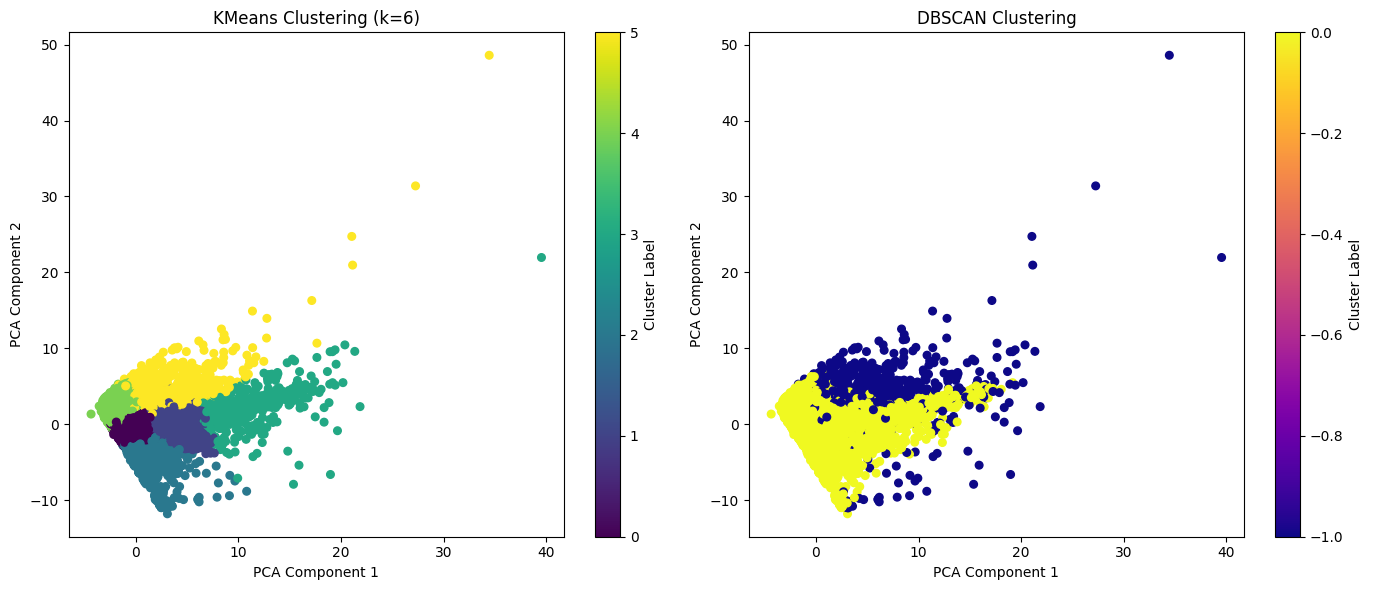

In [148]:
# Reduksi dimensi ke 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- KMeans ---
sc1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap="viridis", s=30)
axes[0].set_title(f"KMeans Clustering (k={optimal_k})")
axes[0].set_xlabel("PCA Component 1")
axes[0].set_ylabel("PCA Component 2")
plt.colorbar(sc1, ax=axes[0], label="Cluster Label")

# --- DBSCAN ---
sc2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap="plasma", s=30)
axes[1].set_title("DBSCAN Clustering")
axes[1].set_xlabel("PCA Component 1")
axes[1].set_ylabel("PCA Component 2")
plt.colorbar(sc2, ax=axes[1], label="Cluster Label")

plt.tight_layout()
plt.show()

# ANN


In [149]:
dim = X_scaled.shape[1]
ann = AnnoyIndex(dim, "euclidean")

for i in range(len(X_scaled)):
    ann.add_item(i, X_scaled[i])

ann.build(10)

query_idx = 42
query_vector = X_scaled[query_idx]

neighbors, distances = ann.get_nns_by_vector(query_vector, 5, include_distances=True)

In [150]:
print(f"Query Point Index: {query_idx}")
print("Nearest Neighbors and Distances:")
for n, d in zip(neighbors, distances):
    print(
        f"Neighbor Index: {n} | Distance: {d:.4f} | Cluster (KMeans): {kmeans_labels[n]}"
    )

Query Point Index: 42
Nearest Neighbors and Distances:
Neighbor Index: 42 | Distance: 0.0000 | Cluster (KMeans): 0
Neighbor Index: 2212 | Distance: 0.3681 | Cluster (KMeans): 0
Neighbor Index: 1304 | Distance: 0.4530 | Cluster (KMeans): 0
Neighbor Index: 3978 | Distance: 0.5150 | Cluster (KMeans): 0
Neighbor Index: 1459 | Distance: 0.5566 | Cluster (KMeans): 0


# Tulis kesimpulan singkat:

In [154]:
print("KMeans Silhouette:", silhouette_score(X_scaled, kmeans_labels))
print("KMeans Davies-Bouldin:", davies_bouldin_score(X_scaled, kmeans_labels))
print("DBSCAN Silhouette:", silhouette_score(X_scaled, dbscan_labels))
print("DBSCAN Davies-Bouldin:", davies_bouldin_score(X_scaled, dbscan_labels))
print("\n--------------------------------------------------\n")
print(f"Query Point Index: {query_idx}")
print("Nearest Neighbors and Distances:")
for n, d in zip(neighbors, distances):
    print(
        f"Neighbor Index: {n} | Distance: {d:.4f} | Cluster (KMeans): {kmeans_labels[n]}"
    )

KMeans Silhouette: 0.14440277495175646
KMeans Davies-Bouldin: 1.8881037507422347
DBSCAN Silhouette: 0.5653929533567666
DBSCAN Davies-Bouldin: 2.0089027362497607

--------------------------------------------------

Query Point Index: 42
Nearest Neighbors and Distances:
Neighbor Index: 42 | Distance: 0.0000 | Cluster (KMeans): 0
Neighbor Index: 2212 | Distance: 0.3681 | Cluster (KMeans): 0
Neighbor Index: 1304 | Distance: 0.4530 | Cluster (KMeans): 0
Neighbor Index: 3978 | Distance: 0.5150 | Cluster (KMeans): 0
Neighbor Index: 1459 | Distance: 0.5566 | Cluster (KMeans): 0


## Kesimpulan Singkat

### a. Perbedaan hasil KMeans dan DBSCAN
- KMeans menghasilkan nilai Silhouette 0.144 dan Davies-Bouldin Index (DBI) 1.88, hal ini menunjukkan bahwa pemisahaan antar cluster masih lemah
- Sementara DBSCAN memiliki Silhouette 0.565, jauh lebih baik daripada KMeans. Namun memiliki Davies-Bouldin 2.009 yang sedikit lebih buruk daripada KMeans
- Dikarenakan Silhouette Score lebih mencerminkan kualitas pemisahan antar cluster dan kepadatan dalam cluster. Jadi DBSCAN lebih baik daripada KMeans dalam mengelompokkan data ini. karena nilai Silhouette nya jauh lebih tinggi yang menunjjukan pemisahaan cluster yang lebih jelas.
---

### b. Nilai metrik terbaik
Tuliskan **nilai metrik terbaik** berdasarkan:
- **Silhouette Score**

    Silhouette yang terbaik dimiliki oleh model DBSCAN dengan nilai 0,565. Hal ini karena semakin tinggi (mendekati 1) maka semakin baik atau cluter lebih terpisah jelas

- **Davies–Bouldin Index (DBI)**

    Davies–Bouldin yang terbaik dimiliki oleh KMeans dengan nilai 1,888. Hal ini karena semakin rendah akan semakin baik (cluster lebih kompak memiliki data yang saling berdekatan satu sama lain di dalamnya)


---

### c. Hasil query Annoy
Apakah **tetangga yang ditemukan oleh Annoy** termasuk dalam **cluster yang sama**?  
Jelaskan alasan dari jawaban anda.

**Jawaban:**
- Query point index: 42
- Tetangga terdekat: indeks [42, 2212, 1304, 3978, 1459]
- Semua tetangga berada pada cluster KMeans yang sama (cluster 0).

**Penjelasan Kesimpulan:** hasil dari Annoy nearest neighbors konsisten dengan hasil klasterisasi KMeans. nearest neighbors yang ditemukan memang memiliki karakteristik serupa dan termasuk dalam cluster yang sama.

